In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df =  pd.read_csv("D:\Py Django\DataScience\Classification\Decision Tree\Classification\loan_approval_dataset_800.csv")
df

,age,gender,married,job_type,education,credit_score,loan_amount,dependents,property_area,loan_approved
0,29,male,no,salaried,graduate,798,194334,4,urban,1
1,45,female,yes,unemployed,graduate,340,508093,1,urban,0
2,24,male,yes,salaried,postgraduate,807,188898,0,urban,1
3,60,female,no,unemployed,postgraduate,327,52586,2,rural,0
4,44,female,yes,self-employed,undergraduate,581,971575,3,urban,0
...,...,...,...,...,...,...,...,...,...,...
795,47,male,yes,salaried,graduate,408,76809,4,semi-urban,0
796,48,female,yes,self-employed,graduate,522,607025,4,rural,1
797,51,male,yes,salaried,undergraduate,723,824740,4,semi-urban,0
798,55,male,no,salaried,graduate,559,669345,1,urban,0


In [3]:
label_encoders = {}
for column in df.columns[:-1]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,age,gender,married,job_type,education,credit_score,loan_amount,dependents,property_area,loan_approved
0,8,1,0,0,0,371,118,4,2,1
1,24,0,1,2,0,29,391,1,2,0
2,3,1,1,0,1,378,115,0,2,1
3,39,0,0,2,1,18,3,2,0,0
4,23,0,1,1,2,209,774,3,2,0
...,...,...,...,...,...,...,...,...,...,...
795,26,1,1,0,0,78,33,4,1,0
796,27,0,1,1,0,161,478,4,0,1
797,30,1,1,0,2,313,649,4,1,0
798,34,1,0,0,0,191,513,1,2,0


In [4]:
x = df.drop('loan_approved',axis=1)
y = df['loan_approved']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [6]:
x_train
x_test
y_train
y_test

745    1
604    0
655    1
320    0
5      0
      ..
623    0
646    0
157    0
539    1
40     1
Name: loan_approved, Length: 160, dtype: int64

In [7]:
model = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=40)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
x_predict = model.predict(x_test)
x_predict

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0])

In [9]:
accuracy = accuracy_score(x_predict,y_test)
print(f"Accuracy Score : {accuracy * 100:.2f}%")

Accuracy Score : 75.62%


[Text(0.5, 0.875, 'credit_score <= 304.5\ngini = 0.416\nsamples = 640\nvalue = [451, 189]\nclass = loan rejected'),
 Text(0.25, 0.625, 'education <= 0.5\ngini = 0.285\nsamples = 430\nvalue = [356, 74]\nclass = loan rejected'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'loan_amount <= 57.0\ngini = 0.137\nsamples = 190\nvalue = [176.0, 14.0]\nclass = loan rejected'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]\nclass = loan rejected'),
 Text(0.1875, 0.125, 'gini = 0.116\nsamples = 178\nvalue = [167, 11]\nclass = loan rejected'),
 Text(0.375, 0.375, 'education <= 1.5\ngini = 0.375\nsamples = 240\nvalue = [180, 60]\nclass = loan rejected'),
 Text(0.3125, 0.125, 'gini = 0.498\nsamples = 75\nvalue = [35, 40]\nclass = loan approved'),
 Text(0.4375, 0.125, 'gini = 0.213\nsamples = 165\nvalue = [145, 20]\nclass = loan rejected'),
 Text(0.75, 0.625, 'loan_amount <= 375.5\ngini = 0.495\nsamples = 210\nvalue = [95.0, 115.0]\nclass = loan approved'),
 Text(0.625, 0.75, 

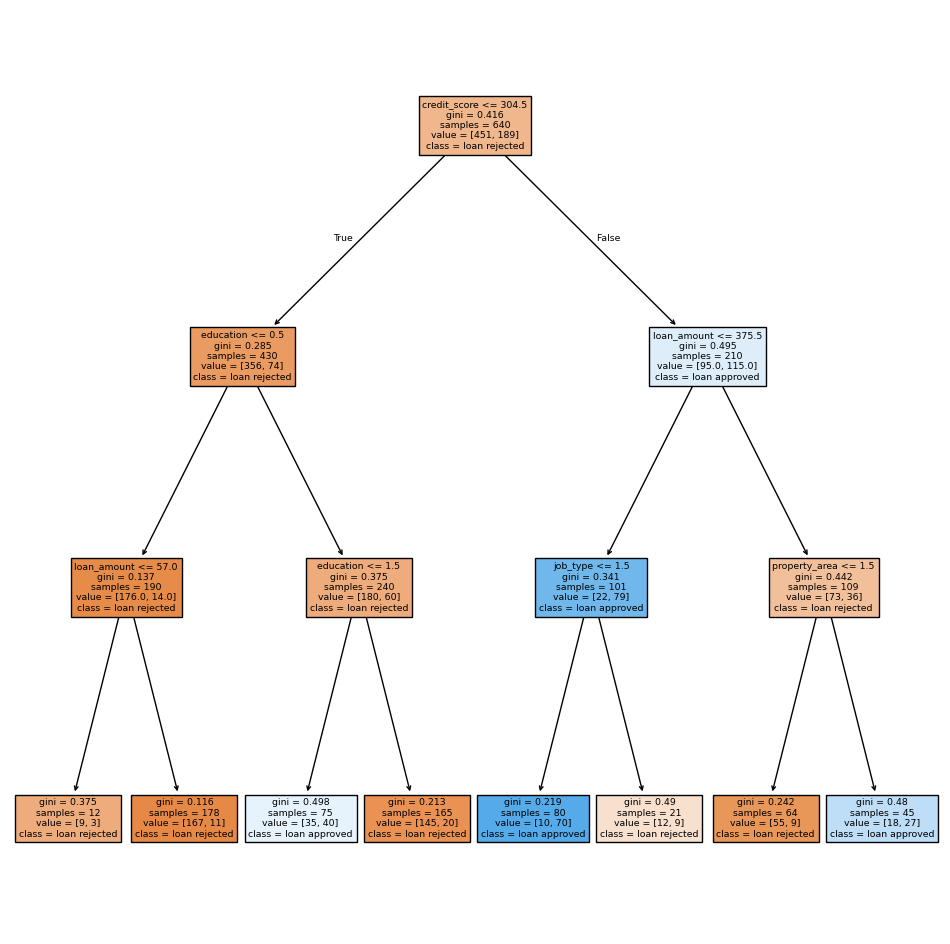

In [10]:
plt.figure(figsize=(12,12))
plot_tree(model,feature_names=["age","gender","married","job_type","education","credit_score","loan_amount","dependents","property_area"],class_names=["loan rejected","loan approved"],filled=True)

In [11]:
def new_data(age, gender, married, job_type, education, credit_score, loan_amount, dependents, property_area, model, encoders):
    features = np.array([[
        encoders["age"].transform([age])[0],
        encoders["gender"].transform([gender])[0],
        encoders["married"].transform([married])[0],
        encoders["job_type"].transform([job_type])[0],
        encoders["education"].transform([education])[0],
        encoders["credit_score"].transform([credit_score])[0],
        encoders["loan_amount"].transform([loan_amount])[0],
        encoders["dependents"].transform([dependents])[0],
        encoders["property_area"].transform([property_area])[0],
    ]])
    prediction = model.predict(features)
    return prediction[0]  

result = new_data(29, "male", "no", "salaried", "graduate", 798, 194334, 4, "urban", model, label_encoders)
print("Loan Approved" if result == 1 else "Loan Rejected")

Loan Approved


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
